# Exploratory analysis on the Iris Dataset

## 1. Import Required Packages and Load and Clean Iris Dataset 

In this section, we will load the required packages and the data. Moreover, the DataFrame will undergo a cleaning process to address missing values and remove any redundant information from its columns, ensuring its suitability for further analysis.

### 1.1 Import required packages

In [1]:
# Working with multidimensional number arrays
import numpy as np

# Plotting
from matplotlib import pyplot as plt

# Working with dataframes
import pandas as pd

# AnchoredText helps to add texts on a pyplot plots
from matplotlib.offsetbox import AnchoredText

# Plotting
import seaborn as sns

# Stats module
import scipy.stats as stats

# Stats module
import statsmodels.api as sm

# One Way ANOVA
from pingouin import anova

# Welch's ANOVA
from pingouin import welch_anova

# Post-Hoc Games-Howell
from pingouin import pairwise_gameshowell as gameshowell

# Post-Hoc Tukey Test
from pingouin import pairwise_tukey as tukey

# Tabulate pandas df
from tabulate import tabulate

### 1.2 Load the Iris data set

In [2]:
# Load the iris dataset
# The iris.data file does not have a header, hence, header=None,
# otherwise, the first row will become a header.
df = pd.read_csv("iris.data", header=None)

# Check out the first five rows of the df
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.3 Load the metadata of the Iris data set with 'with open()' function

If you only use open(), then you must use close() once you finished using a file. The file will stay open in a system and it will consume system's resources if you forget to specify close(). The method 'with open()' ensures that a file will be closed after its use to spare a system's resources.

*See ref on how to use 'with open()' to savely open and close files  
https://note.nkmk.me/en/python-file-io-open-with/*

In [3]:
# rt means to read a text file where r stands for read and t for text file
with open("iris.names", "rt") as file:
    content = file.read()
    print(content)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

### 1.4 Extract the attribute information from the metadata file

In the code cell above, we opened the metadata file of the Iris data set and we found five attributes that correspond to five columns in the iris.data file, respectively: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and class. We will label the five columns of the Iris data set with those attributes.

In [4]:
# Create an object with features' names of numerical variables plus class of categorical variables
feature_names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
# Set the column names as feature names
df.columns = feature_names + ["species"]
# Check out the head of df
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 Clean the df

In the code cell below, we will (1) check if the columns contains nan values and (2) we will clean class column that contains categorical variables about Iris dataset. 
1. We will replace missing values with appropriate information. We will replace missing numerical values with zero and remove samples that does not have class information. Firstly, pd.isna() outputs the df the same size as the input, although, the cells contain Boolean values. The cell becomes False if it does not contain nan, else, the cell becomes True if it does contain nan. This allows us to use .sum() function and see a broader picture if any of the column contains nan values. sum() considers True as the value 1 and False as the value 0, hence, we should see the total sum of 0 if the columns does not contain nan.
2. All values in the class column contains 'Iris-' prefix which is not necessary in this analysis. We already know that these samples comes from Iris genus and we can keep only a species name to keep only informative details of samples.

*See ref. on how to get the string variables of a pandas df column:  
https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/*

In [5]:
# Check if columns do have nan values
pd.isna(df).sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [6]:
# Remove Iris- prefix from all values in the class column
df["species"] = df["species"].str.replace("Iris-", "")
# Show the head of df
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Summary statistics
### 2.1 Calculate summary statistics

In this section, we will calculate summary statistics for each feature, including measures of both central tendency and dispersion. There are two main types of measurements for these statistics: absolute and relative. Absolute measurements quantify the actual values within the dataset, allowing us to observe the direct magnitude of these values. In contrast, relative measurements calculate ratios or coefficients that enable comparisons across different datasets, even those with significantly different magnitudes. (see ref. https://www.geeksforgeeks.org/measures-of-dispersion/). 

#### Meassurements of central tendency  
**Absolute meassures of central tendency:**  
mean, min, max, 1st quartile, median, 3rd quartile.  
**Relative meassures of central tendency:**  
skewness $=\frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}(\frac{x_{i}-\mu}{\sigma})^{3}$ ((-0.5, 0.5) — low or approximately symmetric, (-1, -0.5) U (0.5, 1) — moderately skewed, beyond -1 and 1 — Highly skewed);  
kurtosis $=\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \mu}{\sigma} \right)^4 - 3$ (
Mesokurtic distribution (kurtosis = 3): perfect normal distribution or very close to it,
Leptokurtic distribution (kurtosis > 3): sharp peak, heavy tails,
Platykurtic distribution (kurtosis < 3): flat peak, light tails). 


#### Meassures of dispersion  
**Absolute meassures of dispersion:**  
standard deviation, variance, or range.  
**Relative meassures of dispersion:**  
coefficient of variation $=\frac{\sigma}{\mu}*100$; coefficient of quartile variation $=\frac{Q3-Q1}{Q3+Q1}$



*Calculate mean, standard deviation, minima, maxima and median with numpy  
https://numpy.org/doc/stable//reference/routines.statistics.html*

*Calculate percentiles and quartiles with numpy  
https://numpy.org/doc/2.1/reference/generated/numpy.quantile.html*

*Built-in python function round() to round numbers to a certain decimal point  
https://docs.python.org/3/library/functions.html*

*Replace certain value in a string with another value  
https://www.w3schools.com/python/ref_string_replace.asp*

*Create an empty numpy array  
https://numpy.org/doc/2.1/reference/generated/numpy.empty.html*

*See ref. on how to access specific rows and columns in pandas df  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html*

*Function enumerate() allows to loop through an object while returning number of iterations  
https://www.geeksforgeeks.org/enumerate-in-python/*

*Here you can find how to calculate skewness and kurtosis  
https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis*

*Calculate variance  
https://numpy.org/doc/2.1/reference/generated/numpy.var.html*

In [7]:
adict = dict()
features = df.columns[:4]
statistics = ["mean", "min", "max", "qone", "median", "qthree", "skewness", "kurtosis", "std", 
              "variance", "range", "coefofvar", "coefofquart"]


for feature in features:

    feature_series = df[feature]
    n = len(feature_series)
    
    mean = round(np.mean(feature_series), 2) # Compute mean
    minima = round(np.min(feature_series), 2) # Compute minimum
    maxima = round(np.max(feature_series), 2) # Compute maximum
    qone = round(np.quantile(feature_series,0.25), 2) # Compute first quartile
    median = round(np.median(feature_series), 2) # Compute median
    qthree = round(np.quantile(feature_series,0.75), 2) # Compute third quartile
    std = round(np.std(feature_series), 2) # Compute standard deviation
    var = round(np.var(feature_series), 2) # Compute variance
    arange = round((maxima - minima), 2) # Compute range
    skewness = round((n/((n-1)*(n-2))) * 
                     sum([((val - mean)/std)**3 for val in feature_series]), 2) # Compute skewness
    kurtosis = round((1/n * sum([((val-mean)/std)**4 for val in feature_series]) - 3), 2) # Compute kurtosis
    cof_var = round((std/mean)*100, 2) # Compute coefficient of variation
    cof_quartiles = round((qthree-qone)/(qthree+qone), 2) # Compute coefficient of quartiles
    
    adict[feature] = [mean, minima, maxima, qone, median, qthree, skewness, kurtosis, std, var, arange, 
                       cof_var, cof_quartiles]
    

sum_stats = pd.DataFrame(adict)
sum_stats.index = [statistics]

sum_stats

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
mean,5.84,3.05,3.76,1.20
min,4.30,2.00,1.00,0.10
max,7.90,4.40,6.90,2.50
qone,5.10,2.80,1.60,0.30
median,5.80,3.00,4.35,1.30
qthree,6.40,3.30,5.10,1.80
skewness,0.32,0.37,-0.28,-0.11
kurtosis,-0.62,0.32,-1.40,-1.33
std,0.83,0.43,1.76,0.76
variance,0.68,0.19,3.09,0.58


The summary statistics reveal some characteristics about the distribution of each feature. For sepal length (mean=5.84, median=5.80) and sepal width (mean=3.05, median=3.00), the means and medians are similar, suggesting that these datasets are approximately centered around their respective means. This is further supported by their skewness values (sepal length: 0.32, sepal width: 0.37), which fall within the -0.5 to 0.5 range, indicating a considerably symmetric distribution without significant skew. However, the kurtosis values for sepal length (-0.62) and sepal width (0.32) are both below 3, pointing towards flatter peaks and lighter tails than a normal distribution. This implies that while the data is centered, the overall distribution is less concentrated around the mean and has fewer extreme values compared to a normal distribution.

In contrast, petal length (mean=3.76, median=4.35) and petal width (mean=1.20, median=1.30) show a more noticeable difference between their means and medians, suggesting that the majority of values are not symmetrically distributed around the mean, a deviation from the characteristics of a normally distributed dataset. Despite this, their skewness values (-0.28 and -0.11, respectively) also fall within the -0.5 to 0.5 range, indicating no substantial skewness. Similar to the sepal features, the kurtosis values for petal length (-1.40) and petal width (-1.33) are also below 3, indicating flat peaks and light tails.

The measures of central tendency, particularly the kurtosis values, provide some evidence of non-normality across all features. When examining the dispersion, the coefficients of variation (sepal length: 14.21%, sepal width: 14.10%, petal length: 46.81%, petal width: 63.33%) and the interquartile ranges (approximated by differences in quartiles, e.g., Q3-Q1) suggest that sepal length and sepal width exhibit lower relative and absolute dispersion than petal length and petal width. This indicates that the values for sepal length and width are less spread out and potentially have fewer outliers compared to petal length and petal width.

Considering both the central tendency and dispersion, we can hypothesize that the distributions of sepal length and sepal width more closely resemble a normal distribution than those of petal length and petal width. However, the low kurtosis values across all features suggest a departure from perfect normality. The discrepancy between the means and medians for petal length and width, coupled with their higher dispersion, might indicate potential multimodality or other complexities in their distributions, warranting further visual exploration.

### 2.2 Save summary statistics to a text file

*Convert pandas df to a text file  
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/#:~:text=txt%20File-,To%20write%20a%20Pandas%20dataframe%20to%20a%20.,txt*

In [8]:
sum_stats.to_csv('sum_stats.txt', sep='\t', index=True)

## 3. Explonatory analysis of the Iris dataset

In this section, we will plot histograms, KDE plots, and scatter plots to explore the distribution of each feature and the correlations between feature pairs. This will enhance our understanding of the dataset's features and inform subsequent analyses.

### 3.1 Initial examination of the datasets, Histogram and KDE plot

Here, we will plot histograms and KDE plots for each feature, dividing the data points into three groups corresponding to each class. These plots will illustrate the distribution of each class in comparison to the others. Histograms display the frequency of data points within defined bins. In contrast, KDE plots offer an alternative visualization, presenting the data with less clustering and greater interpretability (see ref: https://seaborn.pydata.org/generated/seaborn.kdeplot.html).


*Histogram plotting  
https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ & https://matplotlib.org/stable/gallery/statistics/hist.html*

*String capitalisation  
https://www.w3schools.com/python/ref_string_capitalize.asp*

*Subplotting with matplotlib  
https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#sphx-glr-users-explain-axes-constrainedlayout-guide-py*

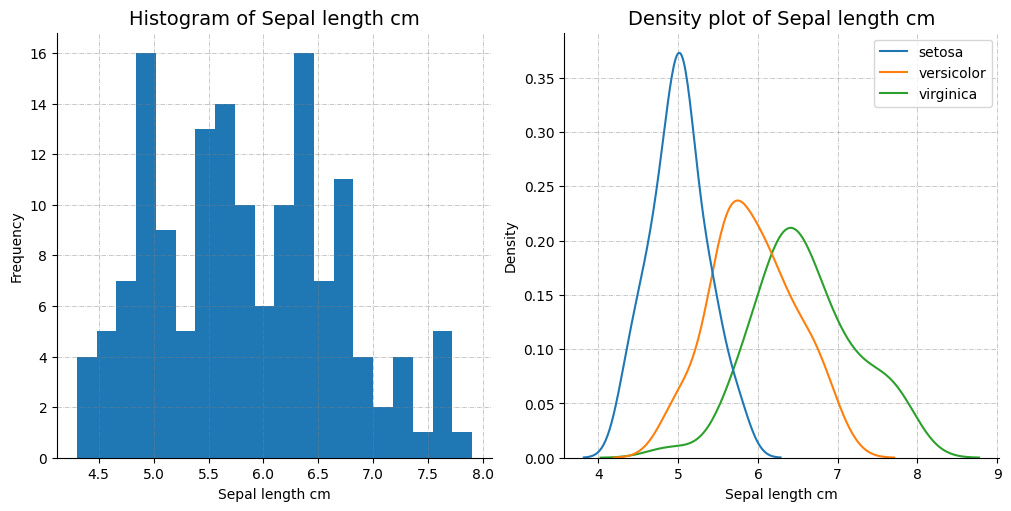

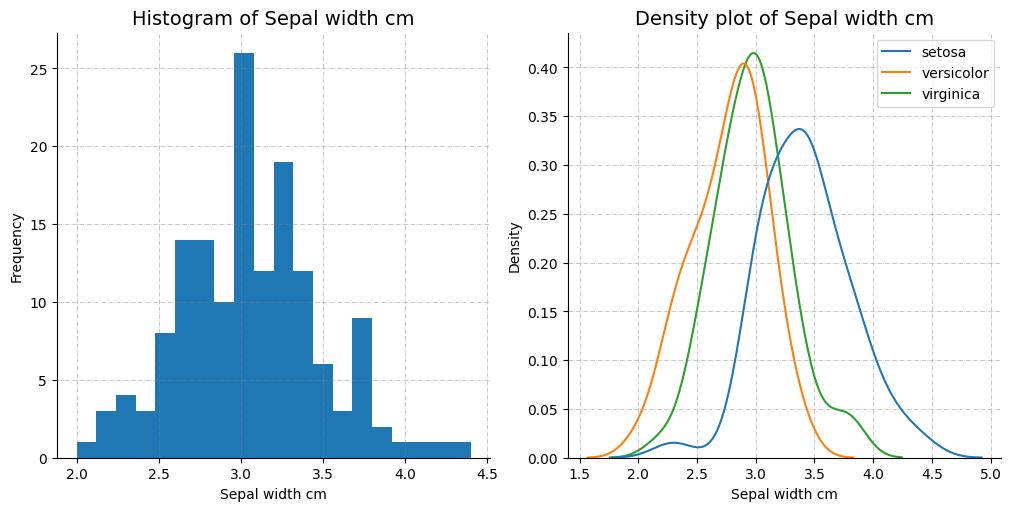

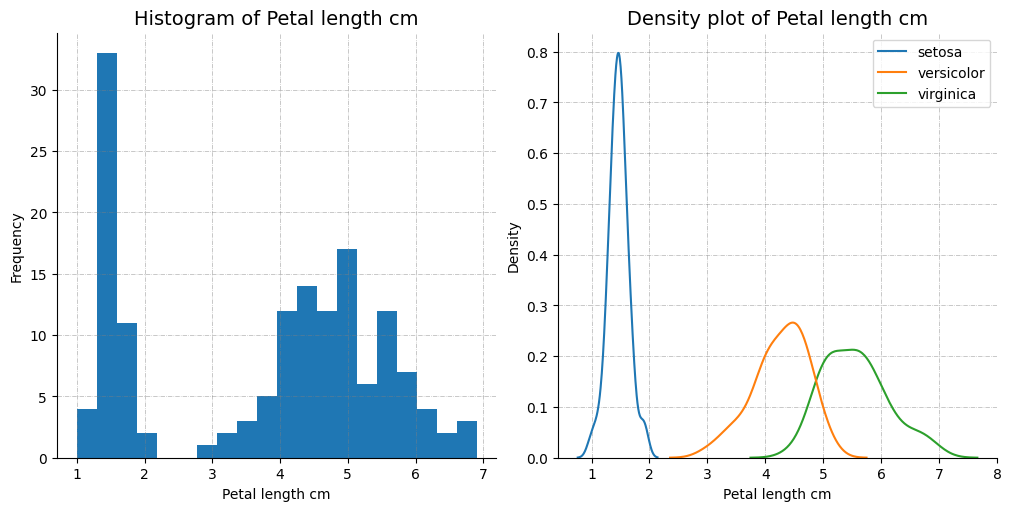

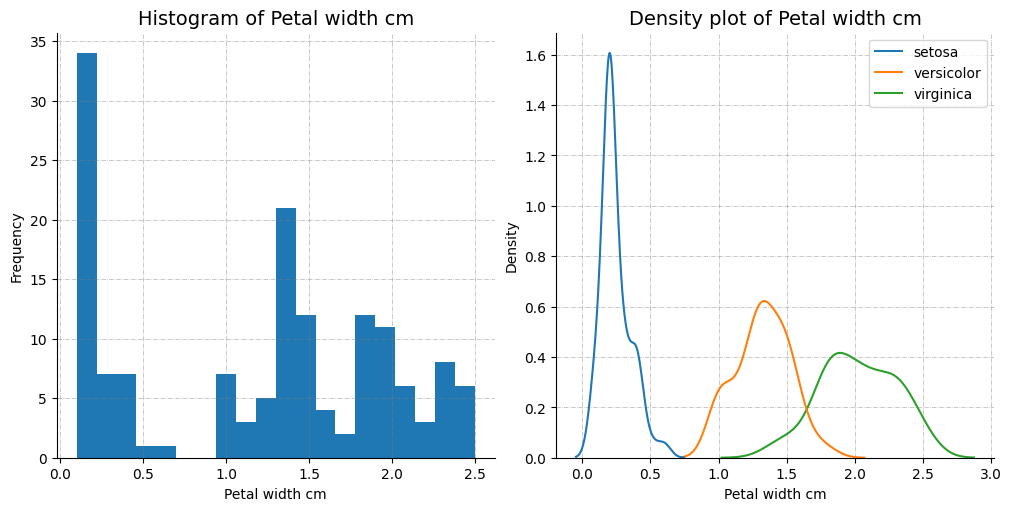

In [9]:
# Iterate through each feature and plot a histogram and KDE plot
for feature in features:
    
    # Define an object with classes names
    # .unique() function allows to get the unique values from the column 
    classes = list(df.iloc[:,4].unique())
    # Replace underscores with an empty space in the feature name
    # This feature name will be used for naming axes and titles 
    feature_name = feature.replace("_", " ")
    
    
    # Define a layout 1x2 of subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    
    # Flatten out the axis so you could iterate through each of them
    axs = axs.flat

    # Iterate through axis and track the # of iterations with enumerate()
    for count, ax in enumerate(axs):

        # Remove axes splines 
        for s in ['top', 'right']: 
            ax.spines[s].set_visible(False) 

        # Add x, y gridlines 
        ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6)
        
        # This if statement tracks the first iteration and plots a histogram
        if count == 0:
            # Plot a histogram of the feature
            # Choose the step type due to better visibility
            ax.hist(df[feature], bins=20)
            # Set the x-axis name
            ax.set_xlabel(f"{feature_name.capitalize()}", fontsize=10)
            # Set the y-axis name
            ax.set_ylabel("Frequency", fontsize=10)
            # Set the subfigure title
            ax.set_title(f"Histogram of {feature_name.capitalize()}", fontsize=14)
            
        else:
            # Create an empty pandas df.
            # You will use this empty df later in the for loop 
            # to add the data of each class in their own column
            temp_df = pd.DataFrame()
            # Iterate three times to add each class in their own column
            for i in range(3):
                # Select samples of a particular class 
                temp_df1 = df[df.iloc[:,4] == classes[i]]
                # Select data for a particular feature
                temp_df2 = temp_df1[feature]
                # Add the data, of a particular class, as a new column of the previously defined df  
                temp_df[classes[i]] = list(temp_df2)
            # Plot a KDE plot
            sns.kdeplot(temp_df, ax=ax)
            # Define x-axis label
            ax.set_xlabel(f"{feature_name.capitalize()}", fontsize=10)
            # Define y-axis label
            ax.set_ylabel("Density", fontsize=10)
            # Define y-axis label
            ax.set_title(f"Density plot of {feature_name.capitalize()}", fontsize=14)
    
    # Save the plot
    plt.savefig(f"{feature}_hist_KDE.png", dpi=300, bbox_inches = 'tight')
    # Show the figure
    plt.show()

**Interpretation of histograms and KDE plots**  
The multimodal nature of the histograms above, exhibiting multiple peaks, is further supported by the KDE plots. These plots reveal that the distinct Iris classes within the dataset are responsible for these multiple peaks. The differences between these classes warrant further exploration.

### 3.2 Plot scatter plots of all feature pairs 
This section will present scatter plots for each feature pair. These plots will include a regression line and the corresponding $R^{2}$ value, which indicates the proportion of variance in the dependent variable explained by the independent variable. This will allow for the visualization of correlations between feature pairs.

#### 3.2.1 Calculate $R^{2}$

The  $R^{2}$ value will be calculated using the following equation: $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 
\frac{\sum (y_{i} - \hat{y}_{i})^2}{\sum (y_{i} - \bar{y})^2}$, where $\hat{y}_{i}$ represents the predicted y value at the $i_{th}$ instance and $\bar{y}$ is the mean of y (*see ref. https://www.youtube.com/watch?v=lng4ZgConCM&t=6s*). To determine $\hat{y}_{i}$, we need the equation of a regression line (*see ref. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-calculate-a-regression-line-169795/*).

The equation of a regression line is $\hat{y} = mx + b$. Currently, we only know the x variable; therefore, we must calculate the slope, m, and the y-intercept, b. The formula for the slope is $m = r * \frac{y_{std}}{x_{std}}$, and the formula for the y-intercept is $b = y_{mean} - m*x_{mean}$. and the formula for the y-intercept is $ r=\frac{\sum (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum (x_{i}-\bar{x})^{2} \sum (y_{i}-\bar{y})^{2}}}$ (*see ref. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html*).

Therefore, to calculate $R^{2}$, the following steps are necessary:

1. Calculate the correlation coefficient, r.
2. Calculate the slope, m, of the regression line.
3. Calculate the y-intercept, b, of the regression line.
4. Finally, calculate $R^{2}$.

#### 3.2.2 Plot a regression line on the scatter plot
Once all the necessary variables for calculating R² are obtained, the coordinates of the regression line can be determined using the equation of a line, $y =m*x+b$, and plotted on the scatter plot. 

#### 3.2.3 Define a function to calculate correlation coefficient, r

In this code block we will use the following equation to define a function to compute correlation coefficient,  $ r=\frac{\sum (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum (x_{i}-\bar{x})^{2} \sum (y_{i}-\bar{y})^{2}}}$

In [10]:
def find_r(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    
    # Calculate the nominator
    nominator = sum([(x - x_mean)*(y - y_mean) for x, y in zip(df_x, df_y)])
    # Calculate the denominator
    denominator = (sum([(x - x_mean)**2 for x in df_x]) * sum([(y - y_mean)**2 for y in df_y]))**0.5
    # Calculate correlation coefficient
    r = (nominator / denominator)
    
    # Return correlation coefficient
    return r

#### 3.2.4 Define a function to calculate $R^{2}$

Here we will define a function to calculate $R^{2}$ based on this equation $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 
\frac{\sum (y_{i} - \hat{y}_{i})^2}{\sum (y_{i} - \bar{y})^2}$

In [11]:
# Define a function to calculate R^2
def rsquared(df, x, y, sum_stats=sum_stats):
    
    
    # Define x variable
    df_x = df[x]
    # Define y variable
    df_y = df[y]
    
    
    # Calculate the mean and standard deviation of x and y 
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    
    # Calculate correlation coefficient, r
    r = find_r(df_x,df_y)
    
    # Find the slope of the regression line, m
    m = r * (y_std / x_std)

    # Find the intercept of the regression line, b
    b = y_mean - m*x_mean
    
    
    # Get the Residual Sum of Squares
    SE_line = 0
    for i in range(len(x)):
        SE_line += (df_y[i] - (m*df_x[i] + b))**2
    
    
    # Get the Total Sum of Squares
    SE = 0
    for i in range(len(y)):
        SE += (df_y[i] - y_mean)**2
    
    
    # Use the formula above to calculate R^2
    r_squared = 1 - (SE_line / SE)
    
    return round(r_squared, 2) # Round R^2 to two decimal places

### 3.3 Define a function to plot a regression line

The function below generates the coordinates of a regression line given sets of x and y data points. The equation of a line is $y=m*x+b$. To find the y-coordinates of a regression line, we need to determine the slope (m) and y-intercept (b) and then substitute any x value into the equation. We will use the formulas defined previously to calculate m and b. Subsequently, we will generate a range of x values and iteratively substitute them into the equation to obtain the corresponding y values. These resulting x and y values will represent the coordinates of the regression line for the given x and y datasets.


*Calculate standard deviation  
https://www.investopedia.com/terms/s/standarddeviation.asp*

In [12]:
def regression_line(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    # Find the slope, m
    m = find_r(df_x, df_y) * (y_std/x_std)
    # Find the intercept, b
    b = y_mean - m * x_mean
    
    # Generate a range of x values
    xs = np.linspace(min(df_x), max(df_x), num=100)
    # Calculate y cordinates using the equation of a line
    y_hats = [(x*m + b) for x in xs]
    
    # Return x and y cordinates of a regression line
    return xs, y_hats

#### Define a function to plot a scatter plot

*Set a suptitle for a main figure  
https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots*

*Set a legend for a figure  
https://stackoverflow.com/questions/74021364/how-to-use-legend-only-once-in-a-subplot-for-a-for-loop*

*Change the size of a figure  
https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot*

*numpy.plofit() function  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Create a polynomial numpy matrix  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Anchored text  
https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-plot*

In [13]:
def plot_scatter(df, ax, feature1, feature2):
    
    #---- Step 1.
    """"Plot a scatter plot of a feature pair. 
    In this step, we will use a foor loop to plot a only a single 
    class samples on the axes through each iteration. 
    This allows to colour code data points based by class and use a 
    function to automatically create a legend for a plot."""
    
    # Plot three scatter plots for each type
    for name in df["species"].unique():

        # Create a temporary df with details for a single type 
        temp_df = df[df["species"] == name]

        # Select x and y cordinates as petal length and width, resptectively
        x = temp_df[feature1]
        y = temp_df[feature2]

        # Plot a scatter plot with previously defined cordinates and
        # use type name as the label of the legend
        ax.scatter(x, y, label=name)

    #---- Step 2. Plot a regression line on the axis.
    # Get the x and y cordinates for a regression line
    xs, y_hats = regression_line(df[feature1], df[feature2])
    # Plot a regression line
    ax.plot(xs, y_hats, color="red")

    #---- Step 3. Calculate R^2 and add it to the scatter plot.
    # Calculate an R^2
    r_squared = rsquared(df, feature1, feature2)
    
    
    # Add the text inside the plot which is R^2 value defined above
    anchored_text = AnchoredText(f"$R^{2}$={r_squared}", loc=2)
    ax.add_artist(anchored_text)
    
    #---- Step 4. Add the x and y axes names
    # Define the name of the first feature
    # Replace underscore with space and capitalise the first letter
    feature1_name = feature1.replace("_", " ").capitalize()
    # Define the name of the second feature
    # Replace underscore with space and capitalise the first letter
    feature2_name = feature2.replace("_", " ").capitalize()
   
    # Name x and y axes
    ax.set_xlabel(feature1_name)
    ax.set_ylabel(feature2_name)

### 3.4 Plot scatter plots of the features

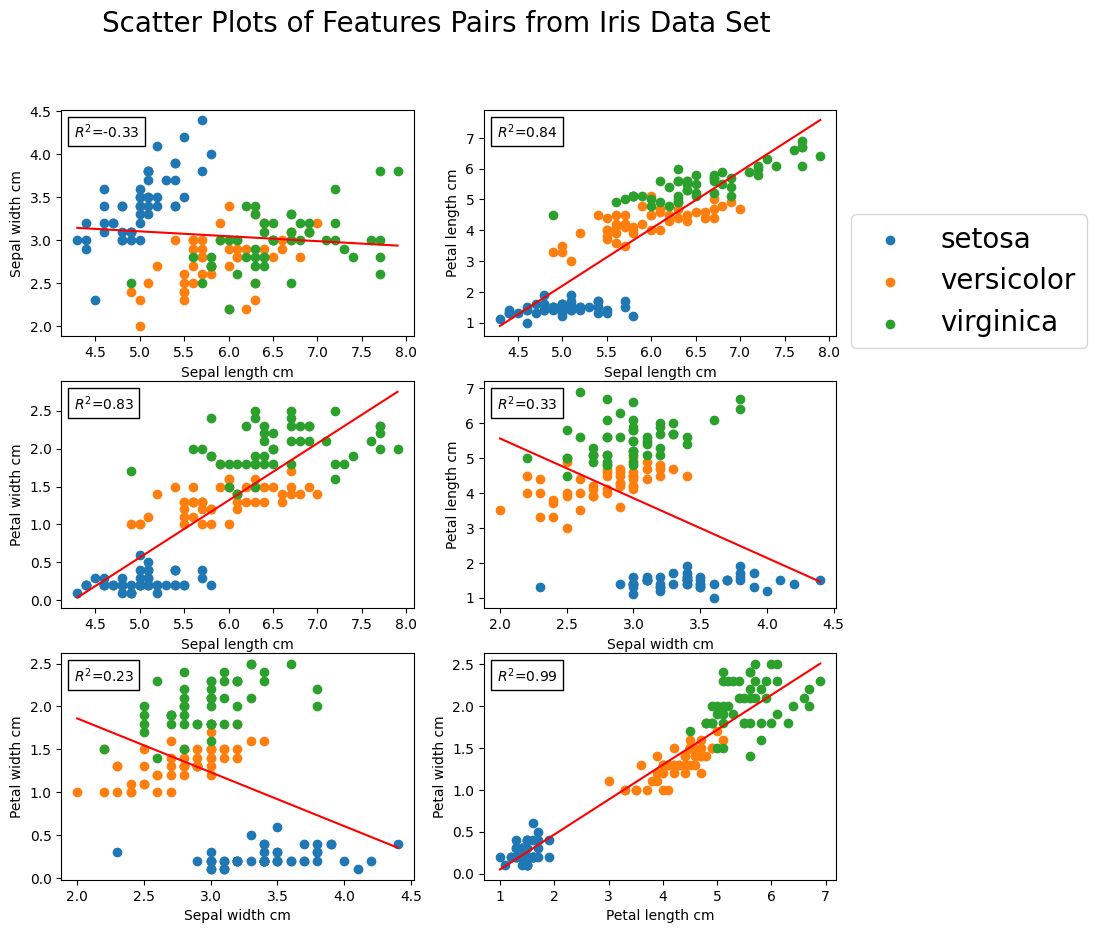

In [14]:
#---- Step 1.
""""
To have all scatter plots on the same figure, we will create a subplot 
layout with 6 axes for each feature pair. This step returns two items, 
fig and axs, where fig stands for a figure and axs stands for 6 axs. 
If we want to modify global view of the figure, then we have to use a fig object, 
else, use axs object to edit the axes."""

# Define a layout of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))


#---- Step 2.
# Use a for loop to go through each axis in the axs object and plot a scatter plot.
# Flatten out the axs object
axs = axs.flat

# We will use count to track the # of scatter plots and used axes
count = 0

# Define features names
features = df.iloc[:,:4].columns

# Go through each axis in the previously defined layout 
# and plot a scatter plot of the feature pair.
for i in range(len(features) - 1):
    plot_scatter(df, axs[count], features[i], features[i+1])
    # add one after using an axis
    count += 1
    
    # Checks if i+2 is not larger than 3,
    # else, it plots the feature pair i and i+2
    if i+2 < 4:
        plot_scatter(df, axs[count], features[i], features[i+2])
        # add one after using an axis
        count += 1
        
    # Checks if i+3 is not larger than 3,
    # else, it plots the feature pair i and i+3
    if i+3 < 4:
        plot_scatter(df, axs[count], features[i], features[i+3])
        # add one after using an axis
        count += 1

#---- Step 3.
# Define the fine details of a figure such as legend and title.
# Set the legend of the figure
# df["class"].unique() gives the names of the three Iris classes
plt.legend(df["species"].unique(), bbox_to_anchor=(1.75, 3), ncol=1, prop={'size': 20})
# Set the title of a figure
fig.suptitle("Scatter Plots of Features Pairs from Iris Data Set", fontsize=20)
# Save the plot
plt.savefig(f"scatter_plots_of_feature_pairs.png", dpi=300, bbox_inches = 'tight')
# Show the figure
plt.show()

The scatter plots above clearly illustrate three distinct clusters of data points for each feature pair, corresponding to the three Iris classes in the dataset. This further emphasizes the need to examine the differences between these Iris classes for each feature.

## 4. Difference Between Iris Classess

**ANOVA**  
In this section, we will examine the differences between three Iris species—Iris setosa, Iris versicolor, and Iris virginica—across four features: sepal length, sepal width, petal length, and petal width. The most suitable method to test for differences between three or more groups for a single dependent variable is ANOVA (Analysis of Variance). Several ANOVA types are suitable for datasets with different properties. For instance, if the dataset has only one independent variable (factor), then a One-Way ANOVA is appropriate. On the other hand, for datasets with two independent variables, a Two-Way ANOVA is the right choice, and for datasets with three or more independent variables, PERMANOVA (Permutational Multivariate Analysis of Variance) is often the optimal choice, especially when dealing with multivariate data. However, ANOVA relies on three key assumptions: the data must be normally distributed, must exhibit homoscedasticity (homogeneous variance), and the data points must be independent. If a dataset does not meet the normality or homoscedasticity assumptions, it can sometimes be transformed to see if these assumptions are met after the transformation. If the dataset still does not meet the assumptions even after data transformations, then we can choose from several ANOVA methods suitable for datasets that do not meet these assumptions. In this case, we will use Welch's ANOVA to test for differences between classes in datasets that violate these assumptions. Furthermore, if the dataset does not meet the independence assumption, then it is not suitable for further analyses and should ideally be resampled.

**Normality, Homoscedasticity and Independence**  
To determine which type of ANOVA we should use, we will assess normality using histograms and QQ-plots of the residuals, homoscedasticity with a residuals versus fitted values plot, and the independence of data points by plotting residuals versus ordered values. In addition to these visual aids, we will further test normality and homoscedasticity using the Shapiro-Wilk test and Levene's test, respectively. If the data meet all the assumptions, then we will use the One-Way ANOVA method. The One-Way ANOVA method is suitable for datasets that meet all assumptions and have only one independent variable; in our case, the independent variable is species. Nonetheless, if the data are not normally distributed or do not have equal variances, we have two options: either transform the data or perform Welch's ANOVA, which is a suitable method for datasets that do not meet the standard ANOVA assumptions. Before deciding to use Welch's ANOVA, we will explore data transformations. There are many ways to transform data, but here we will use five methods: square root, logarithm, squaring, exponential, and reciprocal transformations. If the data meet the assumptions after transformation, then we will use the transformed data with a One-Way ANOVA. However, if none of the transformations successfully allow the data to meet all the assumptions, then we will use Welch's ANOVA. In addition, if the data do not meet the independence criterion, then we either have to collect new samples in a way that ensures independence or include the variable causing the dependence in the statistical model.

**Post-Hoc**  
When the ANOVA model yields a statistically significant result, it indicates that there is a significant difference between at least one pair of the groups being compared. In such cases, a post-hoc test is performed to identify precisely which pairs exhibit this significant difference. Several types of post-hoc tests are available. Ideally, Tukey's Honestly Significant Difference (HSD) test is employed when the data meet both the normality and homoscedasticity assumptions. Conversely, if the data violate these assumptions, the Games-Howell test may be used to determine which specific pairs of groups show a significant difference in their means.

### 4.1 Visual Examination of Normality, Homogeneity of variance, Independence

In this code block, we will generate visualizations to assess the assumptions of our statistical analysis. Specifically, we will plot a histogram of the residuals and a Quantile-Quantile (QQ) plot of theoretical versus residual quantiles to examine the normality of the data. Homoscedasticity (equal variance) will be evaluated using a scatter plot of residuals against fitted values. Finally, the independence of the data points will be checked by plotting residuals against their ordered values. Residuals, in this context, represent the difference between an observed data value and its corresponding predicted data value (see ref. https://www.displayr.com/learn-what-are-residuals/). Here, the observed value is a data point from our Iris dataset, and the predicted value is the mean value of the species group to which that data point belongs.

While we could assess the overall normality or variance by plotting the observed values, this would necessitate creating separate plots for each species. In contrast, plotting the residuals allows us to examine these assumptions for the entire dataset, encompassing all species, on a single plot. The residuals of the entire dataset provide a consolidated view, as the residuals within each species group sum to zero, effectively removing the inherent variability between the original group means and allowing for a more direct assessment of the underlying assumptions.

The histogram of the residuals visually represents the data's distribution, and we look for a bell-shaped curve indicative of normality. The QQ-plot, a graphical comparison of the theoretical quantiles of a normal distribution against the quantiles of our residuals, helps us further assess normality. In this plot, we expect the points to fall approximately along a straight line. Deviations from this straight line suggest departures from normality. To evaluate the homogeneity of variance, we will examine the scatter plot of residuals versus fitted values. Ideally, we should observe a roughly equal spread of residuals across the range of fitted values, without any systematic patterns or funneling, which would indicate unequal variances.

Furthermore, to test the independence of the data, we will plot the ordered data values against their corresponding residuals. A random scatter of points in this plot suggests independence. Conversely, any discernible non-random pattern indicates that the data points might be dependent on some unmodeled variable. If the dataset fails to meet the independence criterion, it should ideally not be used for standard ANOVA testing, or at the very least, the variable causing the dependence should be incorporated into a more complex statistical model to account for this dependency when analyzing group differences.

*What does QQ-plot mean?  
https://www.datacamp.com/tutorial/qq-plot?dc_referrer=https%3A%2F%2Fwww.google.com%2F*

*Theory about assessment of normality, equal variance and independence for ANOVA  
https://www.youtube.com/watch?v=1qqTAgamMGw*

*Using matplotlib axes for seaborn plots  
https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface*

*Stats probplot  
https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html*

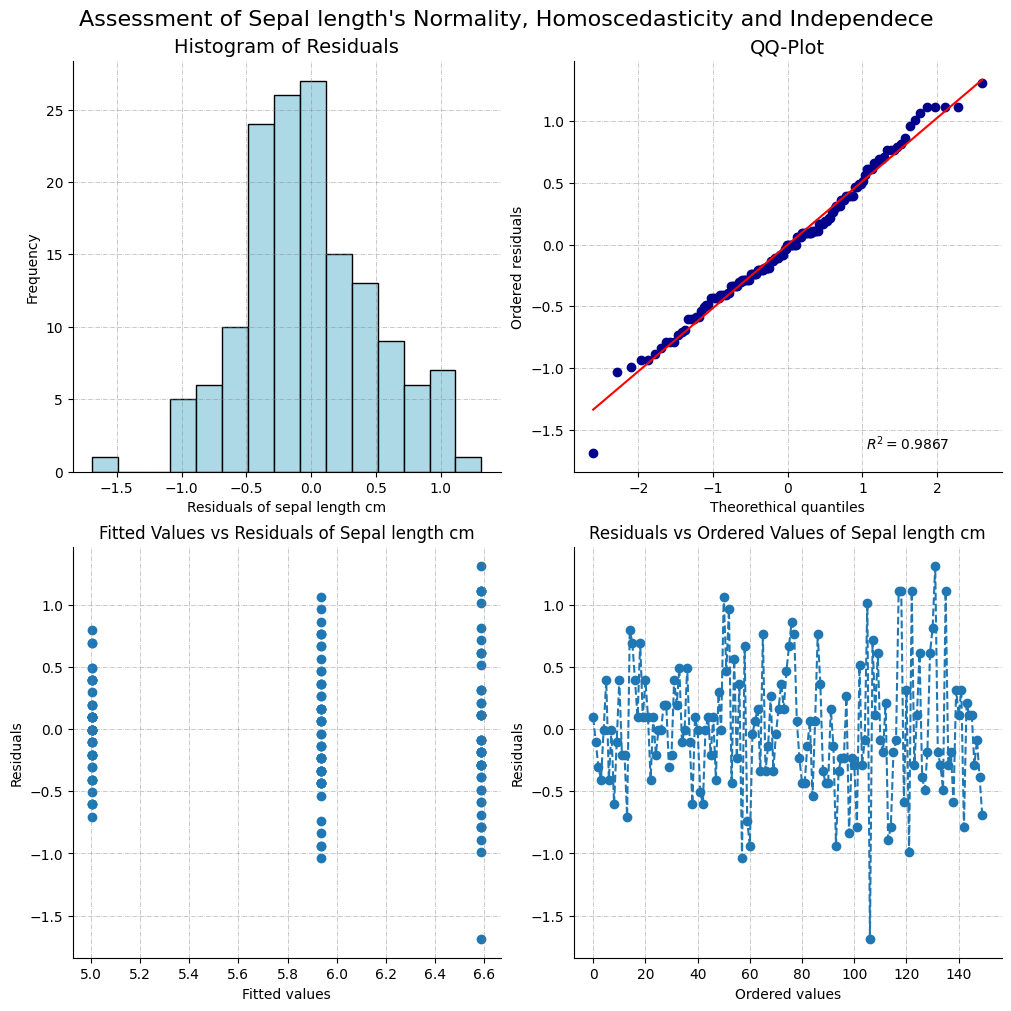

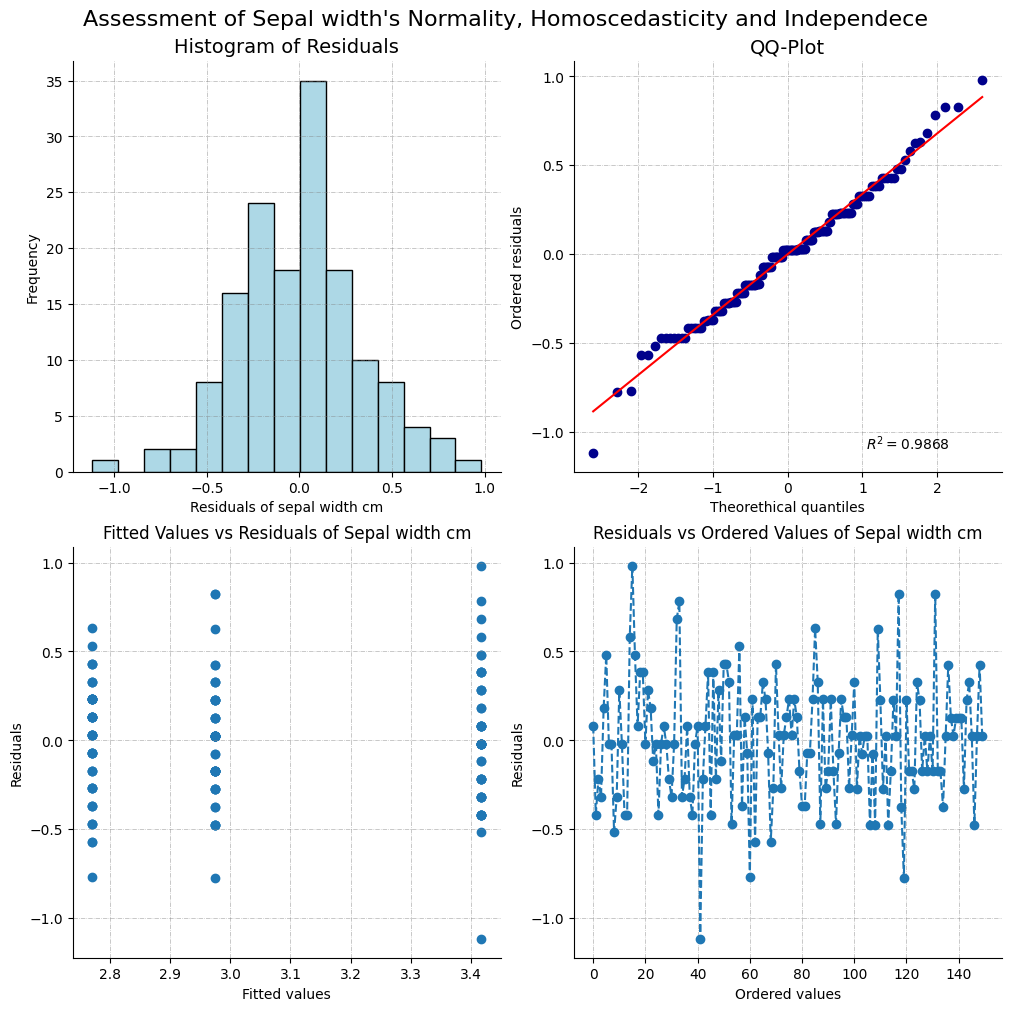

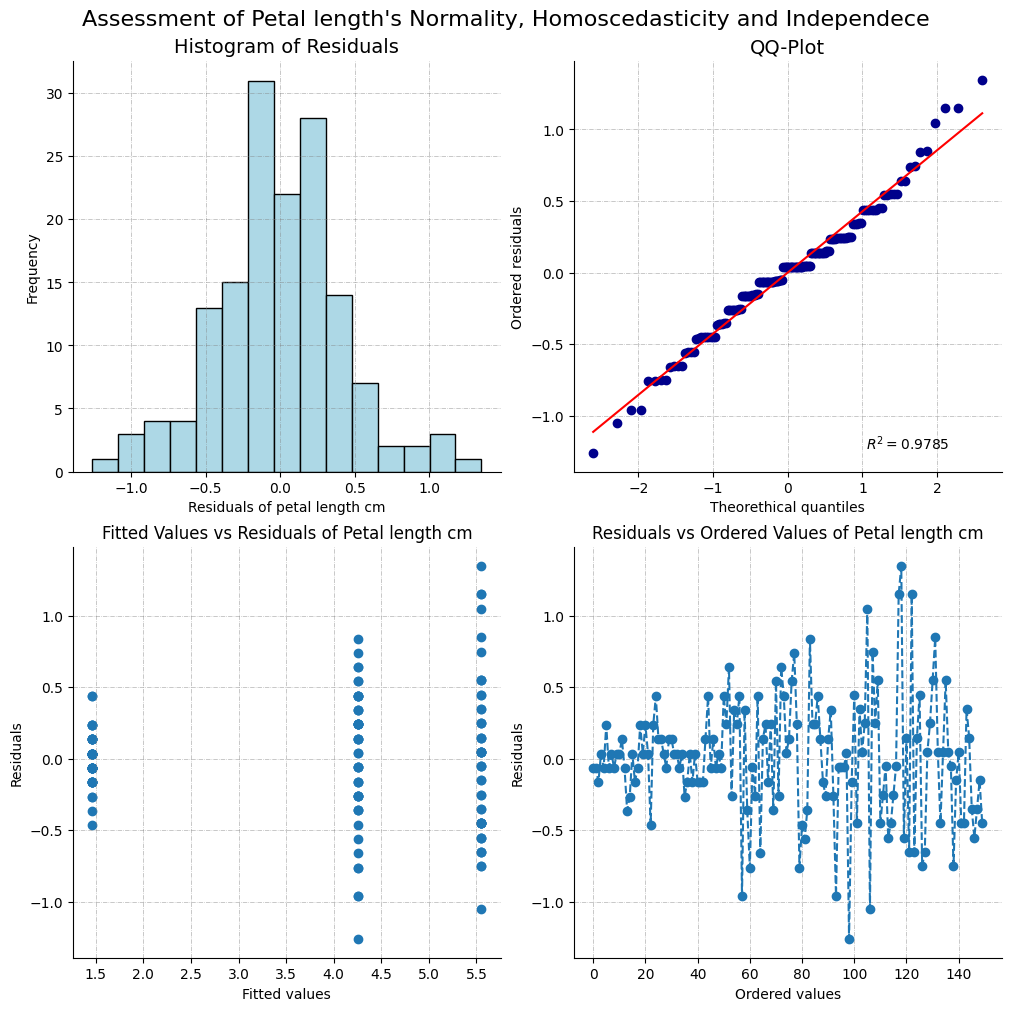

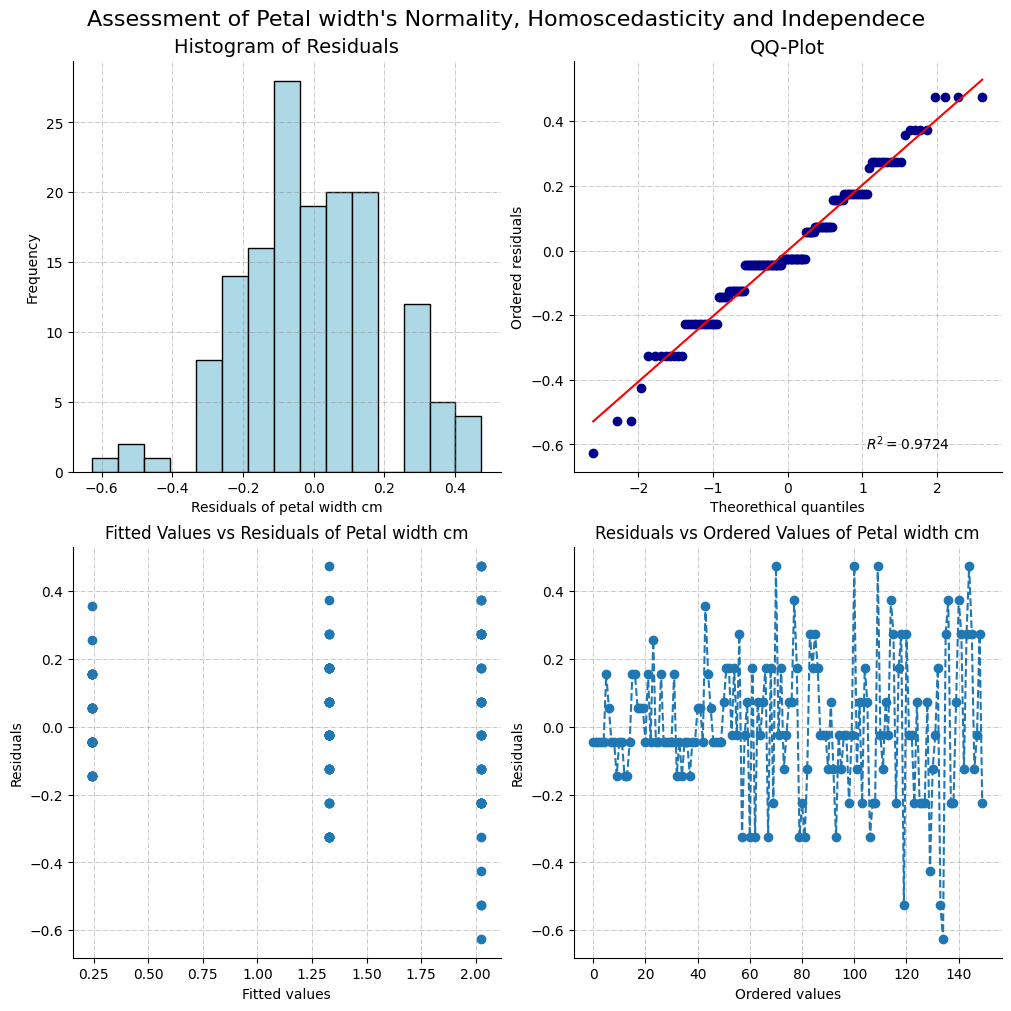

In [15]:
# Loop through each feature
for feature in features:
    
    # Define a layout of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
    
    # Define the classes names
    classes = list(df.iloc[:,4].unique())

    # Define the feature names so you could use them for naming the axes and titles
    feature_name = feature.replace("_", " ")

    #### Calculate residuals of a feature
    # Store residuals
    resid = []
    # Store fitted values
    fitted_values = []
    # Iterate through each class and calculate residuals for a feature
    for aclass in classes:
        # Create a temporary df which contains only one class samples
        temp_df = df[df["species"] == aclass]
        # Select values of a particular feature
        df1 = temp_df[feature]
        # Calculate the mean of a feature for a particular class
        df1_mean = np.mean(df1)
        # Create fitted values for each corresponding residual
        fitted_values += [df1_mean] * len(df1)
        # Compute residuals of a feature for a particular class
        df1_resid = [float(round(x - df1_mean, 3)) for x in df1]
        # Add residuals of a feature to the df that contains residuals of other classes
        resid = resid + df1_resid
    

    # Flatten out the axes so you could iterate through them
    axs = axs.flat
    for count, ax in enumerate(axs):

        # Remove axes splines 
        for s in ['top', 'right']: 
            ax.spines[s].set_visible(False) 

        # Add x, y gridlines 
        ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6)
        
        # Plot a histogram
        if count == 0:
            ax.hist(resid, bins=15, 
                        color="lightblue", edgecolor='black')
            ax.set_xlabel(f"Residuals of {feature_name}", fontsize=10)
            ax.set_ylabel("Frequency", fontsize=10)
            ax.set_title("Histogram of Residuals", fontsize=14)
            
        # Plot a QQ-Plot
        elif count == 1:
            stats.probplot(resid, dist="norm", plot=ax, rvalue=True)
            ax.lines[0].set_color('darkblue') 
            ax.set_xlabel("Theorethical quantiles", fontsize=10)
            ax.set_ylabel("Ordered residuals", fontsize=10)
            ax.set_title("QQ-Plot", fontsize=14)
        
        # Plot a fitted values vs residuals (Homoscedasticity check)
        elif count == 2:
            ax.scatter(fitted_values,resid)
            ax.set_xlabel("Fitted values")
            ax.set_ylabel("Residuals")
            ax.set_title(f"Fitted Values vs Residuals of {feature_name.capitalize()}")
        
        # Plot residuals vs ordered values (Independece check)
        else:
            ax.plot(resid, marker="o", linestyle="--")
            ax.set_xlabel("Ordered values")
            ax.set_ylabel("Residuals")
            ax.set_title(f"Residuals vs Ordered Values of {feature_name.capitalize()}")
            print("""
            
            
            """)

    
    # Set the title
    fig.suptitle(f'Assessment of {feature_name.replace(" cm", ""
).capitalize()}\'s Normality, Homoscedasticity and Independece', fontsize=16)
    # Save the plot
    plt.savefig(f"{feature}_assesment_of_norm_var_ind.png", dpi=300, bbox_inches = 'tight')
    # Show the plot
    plt.show()

Below is an interpretation of the plots for each feature regarding normality, homoscedasticity, and independence:

**Sepal length:**  
* Histogram: Normal  
* QQ-plot: Normal  
* Fitted values vs Residuals (Homoscedasticity): Equal variance  
* Residuals vs Ordered values (Independence): Independent  

**Sepal width:**  
* Histogram : Normal  
* QQ-plot: Normal  
* Fitted values vs Residuals (Homoscedasticity): Equal variance  
* Residuals vs Ordered values (Independence): Independent  

**Petal length:**  
* Histogram: Not normal  
* QQ-plot: Not normal  
* Fitted values vs Residuals (Homoscedasticity): Unequal variance  
* Residuals vs Ordered values (Independence): Independent  

**Sepal width:**  
* Histogram: Not normal  
* QQ-plot: Not normal  
* Fitted values vs Residuals (Homoscedasticity): Unequal variance  
* Residuals vs Ordered values (Independence): Independent  

### 4.2 Shapiro-Wilk test and Levene's test

In this code block, we will continue our assessment of the ANOVA assumptions—normality and homoscedasticity—using the Shapiro-Wilk test and Levene's test, respectively. For both tests, we will use a significance level (alpha value) of 0.05.

1. Assessment of Normality and Homoscedasticity with Original Data:

Our initial assessment of the original data revealed the following p-values for the Shapiro-Wilk test (normality) and Levene's test (homoscedasticity):

Sepal Width: Shapiro-Wilk p-value = 0.32435, Levene's p-value = 0.524827. This dataset was the only one to satisfy both the normality and homoscedasticity assumptions in its original form.  
Sepal Length: Shapiro-Wilk p-value = 0.21886, Levene's p-value = 0.00225853. This dataset failed the assumption of homoscedasticity.  
Petal Length: Shapiro-Wilk p-value = 0.03776, Levene's p-value = 3e-08. This dataset failed both the normality and homoscedasticity assumptions.  
Petal Width: Shapiro-Wilk p-value = 0.00436, Levene's p-value = 3e-08. This dataset also failed both the normality and homoscedasticity assumptions.  
Given that three out of the four features did not meet one or both of the ANOVA assumptions, we proceeded to the next step to explore data transformations for these features.

2. Assessment of Normality and Homoscedasticity with Transformed Data:

We applied five common data transformations—square root, logarithm, squaring (power of two), exponential, and reciprocal—to the sepal length, petal length, and petal width datasets to see if these transformations could help them meet the ANOVA assumptions.

The results after transformation were as follows:

Only the Sepal Length dataset met both assumptions after a logarithmic transformation (Shapiro-Wilk p-value = 0.24236, Levene's p-value = 0.11437336).
The Petal Width and Petal Length datasets did not meet both the normality and homoscedasticity assumptions after any of the five applied transformations.
The types of data transformations explored were:


3. Conclusion of the Analysis:

Based on our assessment of the ANOVA assumptions, we will proceed with the following statistical tests:

For Sepal Width, which met the assumptions with the original data, we will perform a One-Way ANOVA on the original dataset.  
For Sepal Length, which met the assumptions after a logarithmic transformation, we will perform a One-Way ANOVA on the log-transformed dataset.  
For Petal Width and Petal Length, which did not meet the ANOVA assumptions even after transformation, we will use Welch's ANOVA. Welch's ANOVA is a robust alternative to the standard One-Way ANOVA that does not assume equal variances and is less sensitive to violations of normality, making it suitable for comparing means of groups when the standard ANOVA assumptions are not met.


*Data transformation  
https://medium.com/data-science/types-of-transformations-for-better-normal-distribution-61c22668d3b9 & https://www.pythonfordatascience.org/parametric-assumptions-python/*

*Levene's test  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html*

*Linear regression model  
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.from_formula.html*

*Transform Pandas dataframe  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html*

In [16]:
# Create a new df to store values from Shapiro-Wilk's and Levene's tests
norm_var_df = pd.DataFrame()


# Transform data
df_temp = df.copy()
df_temp["sepal_length_cm"] = df_temp["sepal_length_cm"].transform(np.log)
df_temp["petal_length_cm"] = df_temp["petal_length_cm"].transform(np.log)
df_temp["petal_width_cm"] = df_temp["petal_width_cm"].transform(np.sqrt)

# Iterate through each feature
for feature in features:
    
    # Define a formula
    formula = f"{feature} ~ species"
    # Iniate the model
    model = sm.OLS.from_formula(formula, df_temp)
    # Fit the model
    fitted_model = model.fit()
    # Obtain residuals of a model
    resid = fitted_model.resid
        
    # Perform Shapiro-Wilk's test
    shapiro, shap_pval = stats.shapiro(resid)
    # Perform Levene's test
    levene, lev_pval = stats.levene(resid[:50], resid[50:100], resid[100:])
    
    # Store test values in dictionary
    values = {"shap_val": shap_pval, "lev_pval": lev_pval, "feature": feature}
    # Convert the dictionary into pandas df
    values = pd.DataFrame(values, index=[0])
    # Concatenate test values into a single df containing results for all features
    norm_var_df = pd.concat([norm_var_df, values], ignore_index=True)
    
    fitted_model = None
    
norm_var_df["transformation"] = ["none", "log", "log", "sqrt"]
norm_var_df["ANOVA_assumptions"] = [True, True, False, False]
norm_var_df

,shap_val,lev_pval,feature,transformation,ANOVA_assumptions
0,0.242361,0.114373,sepal_length_cm,none,True
1,0.324351,0.524827,sepal_width_cm,log,True
2,0.046432,0.725469,petal_length_cm,log,False
3,0.022469,0.565158,petal_width_cm,sqrt,False


In [17]:
norm_var_df.to_csv('norm_var_df.txt', sep='\t', index=True)

### 4.3 One Way ANOVA and Welsch's ANOVA

In this section, we will employ ANOVA to analyze the differences in each floral feature among the three Iris species. Following our examination of the ANOVA assumptions, we determined that a standard One-Way ANOVA will be performed on the original sepal width dataset and the log-transformed sepal length dataset. For petal width and petal length, which did not meet the standard ANOVA assumptions, we will use Welch's ANOVA.


*Theory on one Way ANOVA  and Post-Hoc Tukey Tests  
https://www.pythonfordatascience.org/anova-python/*

*One Way ANOVA  
https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova*

*Welch's ANOVA  
https://pingouin-stats.org/build/html/generated/pingouin.welch_anova.html*

In [18]:
# Create a new df to store results from ANOVA.
anova_df = pd.DataFrame()

# Copy the original df so that you would change the original dataset
df_temp = df.copy()
# Perform log transformation so that sepal length would be normal with equal variance
df_temp["sepal_length_cm"] = df_temp["sepal_length_cm"].transform(np.log)

# Iterate through features
for feature in features:
    
    # Create a new df for further analysis.
    # The functions anova and welch_anova takes a df 
    # where you specify dependent and independent variables. 
    new_df = pd.DataFrame()
    new_df["species"] = df_temp['species']
    new_df[feature] = df_temp[feature]
    
    # Perform One Way ANOVA only for feature meeting the assumptions
    if feature in ["sepal_length_cm", "sepal_width_cm"]:
        anova_res = anova(new_df, dv=feature, between="species")
        print(feature.capitalize().replace("_", " "))
        print("""One Way ANOVA  
---------------------------------------------------------------""")
        print(anova_res)
        print("""
        """)
        
        # Add the results to a anova_df
        res_df = anova_res
        res_df["feature"] = feature
        res_df["test_type"] = "One Way ANOVA"
        anova_df = pd.concat([anova_df, res_df], ignore_index=True)
    
    # Perform Welch's ANOVA for feature not meeting the assumptions
    else:
        welch_anova_res = welch_anova(new_df, dv=feature, between="species")
        print(feature.capitalize().replace("_", " "))
        print("""Welch's ANOVA  
---------------------------------------------------------------""")
        print(welch_anova_res)
        print("""
        """)
        
        # Add the results to a post_hoc_df
        res_df = anova_res
        res_df["feature"] = feature
        res_df["test_type"] = "Welch's ANOVA"
        anova_df = pd.concat([anova_df, res_df], ignore_index=True)

Sepal length cm
One Way ANOVA  
---------------------------------------------------------------
    Source  ddof1  ddof2           F         p-unc       np2
0  species      2    147  128.930218  4.580171e-33  0.636912

        
Sepal width cm
One Way ANOVA  
---------------------------------------------------------------
    Source  ddof1  ddof2          F         p-unc       np2
0  species      2    147  47.364461  1.327917e-16  0.391881

        
Petal length cm
Welch's ANOVA  
---------------------------------------------------------------
    Source  ddof1      ddof2            F         p-unc       np2
0  species      2  78.054924  1826.580952  2.853131e-66  0.941319

        
Petal width cm
Welch's ANOVA  
---------------------------------------------------------------
    Source  ddof1      ddof2            F         p-unc       np2
0  species      2  85.376989  1268.262296  3.239262e-64  0.928836

        


The ANOVA output above reveals significant results for all features—sepal width (F=128.930218, p=4.580171e-33), sepal length (F=47.364461, p=1.327917e-16), petal width (F=1826.580952, p=2.853131e-66), and petal length (F=1268.262296, p=3.239262e-64). This significance indicates that for each feature, at least one Iris class differs significantly from the others, thus warranting further post-hoc examination to identify which specific Iris classes exhibit these significant differences.

In [19]:
anova_df.to_csv('anova_df.txt', sep='\t', index=True)

### 4.4 Post-Hoc TukeyHSD and Games-Howell's Tests

In this section, having found a significant overall effect using ANOVA, we will proceed with post-hoc tests to determine which specific species differ significantly for each Iris feature. Consistent with our approach for ANOVA, we will apply Tukey's Honestly Significant Difference (HSD) test to the original sepal width dataset and the log-transformed sepal length dataset, as these met the assumptions of normality and homoscedasticity. For petal width and petal length, which did not meet these assumptions even after transformation, we will use the Games-Howell test.


*Pandas transpose function  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html*

*Tips on how to use pd.concat to combine pandas df  
https://builtin.com/articles/pandas-add-row-to-dataframe#:~:text=You%20can%20use%20the%20append,have%20one%20DataFrame%20already%20declared.&text=The%20ignore_index%3DTrue%20argument%20means,the%20new%20row%20is%20added.*

*TukeyHSD  
https://pingouin-stats.org/build/html/generated/pingouin.pairwise_tukey.html*

*Games-Howell's test
https://pingouin-stats.org/build/html/generated/pingouin.pairwise_gameshowell.html*

*Tabulate the pandas df  
https://stackoverflow.com/questions/18528533/pretty-printing-a-pandas-dataframe*

In [20]:
# Create a new df to store results from Post-Hoc.
# You will use them later on to plot boxplots with significance bars
post_hoc_df = pd.DataFrame()

# Iterate through features
for feature in features:
    
    # Create a new df for further analysis.
    # The functions tukey and gameshowell takes a df 
    # where you specify dependent and independent variables. 
    new_df = pd.DataFrame()
    new_df["species"] = df_temp['species']
    new_df[feature] = df_temp[feature]

    # Perform TukeyHSD test only for feature meeting the assumptions
    if feature in ["sepal_length_cm", "sepal_width_cm"]:
        post_hoc_res = tukey(new_df, dv=feature, between="species")
        post_hoc_res.columns = "A","B", "mean(A)", "mean(B)", "meandiff", "se", "T", "p-adj", "hedges"
        print(feature.capitalize().replace("_", " "))
        print("""Multiple Comparison of Means - Tukey HSD, FWER=0.05  
---------------------------------------------------------------""")
        print(tabulate(post_hoc_res, headers='keys'))
        print("""
        """)
    
    # Perform Games-Howell test only for feature meeting the assumptions
    else:
        post_hoc_res = gameshowell(new_df, dv=feature, between="species")
        post_hoc_res.columns = "A","B", "mean(A)", "mean(B)", "meandiff", "se", "T", "df", "p-adj", "hedges"
        print(feature.capitalize().replace("_", " "))
        print("""Multiple Comparison of Means - Games-Howell, FWER=0.05  
---------------------------------------------------------------""")
        print(tabulate(post_hoc_res, headers='keys'))
        print("""
        """)
    
    # Add the results to a post_hoc_df
    res_df = post_hoc_res
    res_df["feature"] = feature
    post_hoc_df = pd.concat([post_hoc_df, res_df], ignore_index=True)

Sepal length cm
Multiple Comparison of Means - Tukey HSD, FWER=0.05  
---------------------------------------------------------------
    A           B             mean(A)    mean(B)    meandiff         se          T        p-adj    hedges
--  ----------  ----------  ---------  ---------  ----------  ---------  ---------  -----------  --------
 0  setosa      versicolor    1.60821    1.77732   -0.169114  0.0171306   -9.87204  2.15383e-14  -2.11636
 1  setosa      virginica     1.60821    1.88065   -0.272449  0.0171306  -15.9043   2.15383e-14  -3.18579
 2  versicolor  virginica     1.77732    1.88065   -0.103335  0.0171306   -6.03223  3.75121e-08  -1.11095

        
Sepal width cm
Multiple Comparison of Means - Tukey HSD, FWER=0.05  
---------------------------------------------------------------
    A           B             mean(A)    mean(B)    meandiff         se         T        p-adj     hedges
--  ----------  ----------  ---------  ---------  ----------  ---------  --------  ----

The post-hoc output above reveals significant differences between all pairs of Iris classes for all features. This indicates that each Iris species possesses distinct sepal length, sepal width, petal length, and petal width dimensions compared to the others. Consequently, these features can be used to effectively differentiate the Iris species through measurement.

In [21]:
post_hoc_df.to_csv('post_hoc_df.txt', sep='\t', index=True)

### 4.5 Box-Plots of the Post-Hoc Results

In this code block, we will generate boxplots to visually represent the distribution of each Iris feature across the different species. Additionally, we will overlay significance bars on these boxplots to indicate statistically significant differences between pairs of species, where such differences were identified in our post-hoc analyses.

In [22]:
# Have a look at the post-hoc results
post_hoc_df.head()

,A,B,mean(A),mean(B),meandiff,se,T,p-adj,hedges,feature,df
0,setosa,versicolor,1.608205,1.777319,-0.169114,0.017131,-9.872040,2.153833e-14,-2.116355,sepal_length_cm,NaN
1,setosa,virginica,1.608205,1.880654,-0.272449,0.017131,-15.904267,2.153833e-14,-3.185793,sepal_length_cm,NaN
2,versicolor,virginica,1.777319,1.880654,-0.103335,0.017131,-6.032227,3.751215e-08,-1.110946,sepal_length_cm,NaN
3,setosa,versicolor,3.418000,2.770000,0.648000,0.068084,9.517713,2.153833e-14,1.842310,sepal_width_cm,NaN
4,setosa,virginica,3.418000,2.974000,0.444000,0.068084,6.521396,3.147409e-09,1.248226,sepal_width_cm,NaN


*The functions convert_pvalue_to_asterisks and significance were copied from this source  
https://bbquercus.medium.com/adding-statistical-significance-asterisks-to-seaborn-plots-9c8317383235*

*Example on how to annotate significance in boxplots  
https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values/37518947#37518947*

*Create a boxplot with seaborn  
https://seaborn.pydata.org/generated/seaborn.boxplot.html* 

*Color each box with a different color  
https://stackoverflow.com/questions/71459836/how-to-color-each-boxplot-differently#:~:text=artists%20.-,The%20recommended%20way%20to%20change%20the%20colors%20in%20Seaborn%20is,or%20a%20list%20of%20colors*

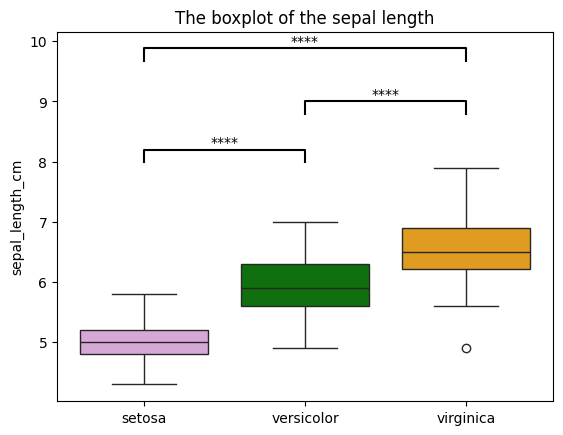

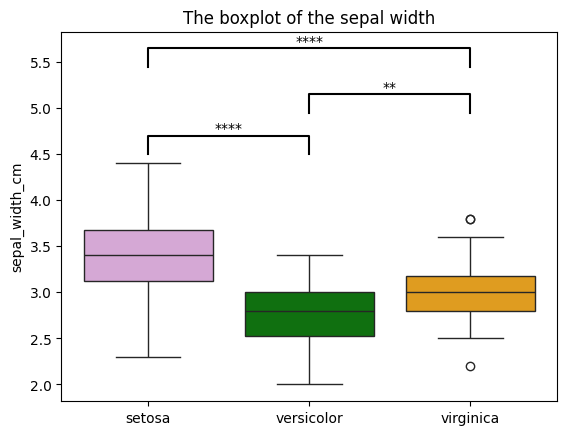

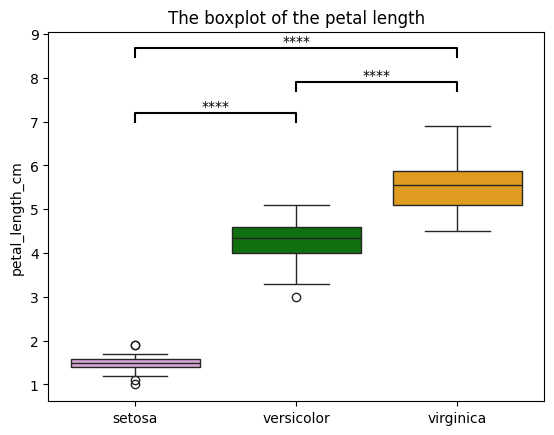

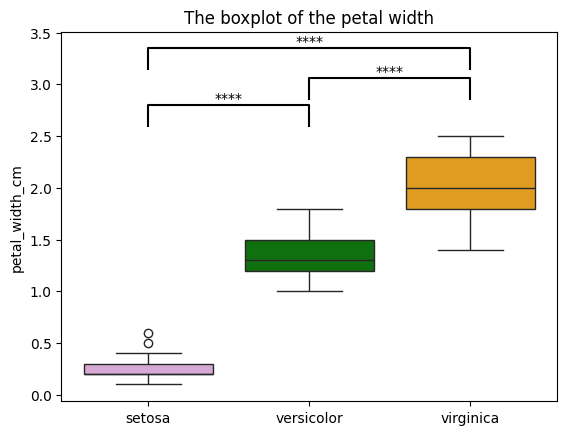

In [23]:
# Define a function to return asterisks or ns based on significance value
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

# Define a function to return if the value is significant or not 
def significance(asterisks):
    if asterisks == "ns":
        return "No"
    else:
        return "Yes"

# Add an asterisks column based on p-adj value
post_hoc_df["asterisks"] = [convert_pvalue_to_asterisks(padj) for padj in post_hoc_df["p-adj"]]
# Add a significant column which specifies if the difference is significant or not
post_hoc_df["significant"] = [significance(asterisks) for asterisks in post_hoc_df["asterisks"]]


# Iterate through features
for feature in features:
    
    # Create a colour palette to color code boxes
    palette = ['plum', 'g', 'orange']

    # Create a boxplot
    boxplot = sns.boxplot(data=df, x="species", y=feature, hue='species', palette=palette
                         )
    
    # Get the significance values
    sig_val = post_hoc_df[post_hoc_df["feature"] == feature]["significant"].tolist()
    # Get the asterisks
    asterisks = post_hoc_df[post_hoc_df["feature"] == feature]["asterisks"].tolist()
    
    # Define the cordinates for xs that stands for each species
    x1, x2, x3 = 0, 1, 2 
    # Define y (the point from which you will start drawing significance bar),
    # h (the height of the significance bar), col (the color of annotation)
    y, h, col = df[feature].max() + 0.1, 0.2, 'k'
    
    
    # In this series of if statements, go through each pair of species
    # and plot a significance bar if there is a significant difference between the pair
    if sig_val[0] == "Yes":
        
        # Plot a significance bar
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        # Add annotation
        plt.text((x1+x2)*.5, y+h, asterisks[0], ha='center', va='bottom', color=col)
        # Increase the y by 10% of the y so it would not overlap with the previous
        # significance bar
        y += (y*0.1)
    
    if sig_val[1] == "Yes":
        
        # Plot a significance bar
        plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
        # Add annotation
        plt.text((x2+x3)*.5, y+h, asterisks[2], ha='center', va='bottom', color=col)
        # Increase the y by 10% of the y so it would not overlap with the previous
        # significance bar
        y += (y*0.1)
    
    if sig_val[2] == "Yes":
        
        # Plot a significance bar
        plt.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
        # Add annotation
        plt.text((x1+x3)*.5, y+h, asterisks[1], ha='center', va='bottom', color=col)

    

    plt.xlabel(None)
    plt.ylabel(feature)
    plt.title(f"The boxplot of the {feature.replace("_", " ").replace(" cm", "")}")
    # Save the plot
    plt.savefig(f"{feature}_boxplot.png", dpi=300, bbox_inches = 'tight')
    plt.show()
    print("""

    """)
    